In [2]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 创建示例距离矩阵
# 注意：距离矩阵应该是对称的，且对角线上的值为0
distance_matrix = np.array([
    [0, 1, 2, 3],
    [1, 0, 4, 5],
    [2, 4, 0, 6],
    [3, 5, 6, 0]
])

# 创建层次聚类模型，指定距离矩阵
clustering = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')

# 拟合模型
clustering.fit(distance_matrix)

# 获取聚类标签
labels = clustering.labels_
print("Cluster labels:", labels)

# 由于我们使用的是距离矩阵，所以无法直接绘制散点图。
# 但是我们可以绘制树状图来可视化层次聚类的过程。
# 使用scipy的linkage函数计算层次聚类的连接矩阵
Z = linkage(distance_matrix, method='complete', metric='precomputed')

# 绘制树状图
plt.figure()
dendrogram(Z)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


/home/Grx/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/tmp/ipykernel_38628/3875181556.py:28: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='complete', metric='precomputed')


Cluster labels: [0 0 0 1]


ValueError: Unknown Distance Metric: precomputed

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 创建示例距离矩阵
# 注意：距离矩阵应该是对称的，且对角线上的值为0
distance_matrix = np.array([
    [0, 1, 2, 3],
    [1, 0, 4, 5],
    [2, 4, 0, 6],
    [3, 5, 6, 0]
])

# 计算层次聚类的连接矩阵
# 使用distance_matrix作为输入，指定metric为precomputed
Z = linkage(distance_matrix, method='complete', metric='precomputed')

# 绘制树状图
plt.figure()
dendrogram(Z)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 获取聚类标签
# 使用fcluster函数来根据距离阈值或者簇的数量获取聚类标签
max_d = 5  # 设定阈值距离
labels = fcluster(Z, max_d, criterion='distance')
print("Cluster labels:", labels)


/tmp/ipykernel_38628/847972657.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='complete', metric='precomputed')


ValueError: Unknown Distance Metric: precomputed

[[0.         3.16227766 5.09901951 7.07106781]
 [3.16227766 0.         5.83095189 7.61577311]
 [5.09901951 5.83095189 0.         8.60232527]
 [7.07106781 7.61577311 8.60232527 0.        ]]


/tmp/ipykernel_38628/3966958800.py:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(condensed_distance_matrix, method='complete')


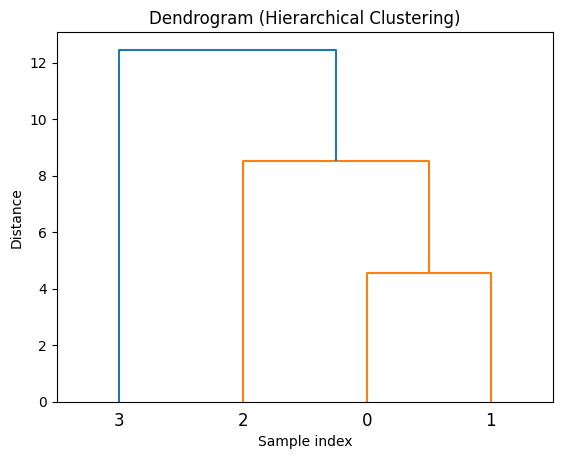

Cluster labels: [1 2 3 4]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import pairwise_distances

# 创建示例距离矩阵
# 注意：距离矩阵应该是对称的，且对角线上的值为0
distance_matrix = np.array([
    [0, 1, 2, 3],
    [1, 0, 4, 5],
    [2, 4, 0, 6],
    [3, 5, 6, 0]
])

# 将距离矩阵转换为适合linkage函数的格式
condensed_distance_matrix = pairwise_distances(distance_matrix, metric='euclidean')

print(condensed_distance_matrix)

# 计算层次聚类的连接矩阵
Z = linkage(condensed_distance_matrix, method='complete')

# 绘制树状图
plt.figure()
dendrogram(Z)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 获取聚类标签
max_d = 4  # 设定阈值距离
labels = fcluster(Z, max_d, criterion='distance')
print("Cluster labels:", labels)


[1 2 3 4 5 6]


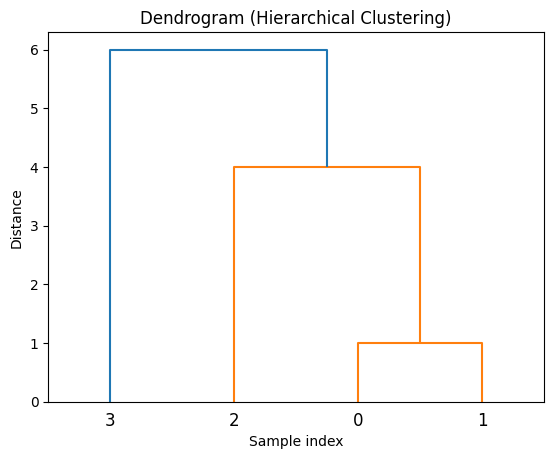

Cluster labels: [1 1 1 2]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

# 创建示例距离矩阵
distance_matrix = np.array([
    [0, 1, 2, 3],
    [1, 0, 4, 5],
    [2, 4, 0, 6],
    [3, 5, 6, 0]
])

# 将距离矩阵转换为压缩的距离向量
condensed_distance_matrix = squareform(distance_matrix)
#condensed_distance_matrix = distance_matrix
print(condensed_distance_matrix)

# 计算层次聚类的连接矩阵
Z = linkage(condensed_distance_matrix, method='complete')

# 绘制树状图
plt.figure()
dendrogram(Z)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 获取聚类标签
max_d = 4  # 设定阈值距离
labels = fcluster(Z, max_d, criterion='distance')
print("Cluster labels:", labels)


In [ ]:
def readr(file):
    l1=[]
    l2=[]
    with open(file) as f:
        for i in f:
            xi=i.split()
            l1.append(xi[1])
            l2.append(float(xi[2]))

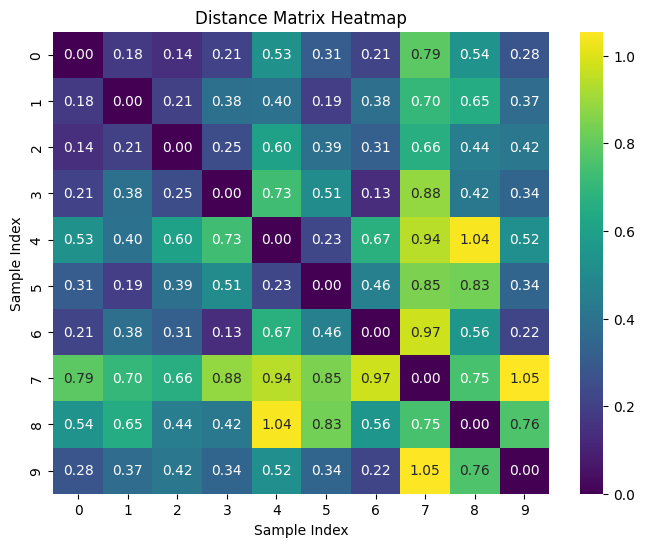

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# 创建示例数据
np.random.seed(0)
X = np.random.rand(10, 2)  # 10个数据点，每个点有2个特征

# 计算成对距离
distance_matrix = pdist(X, metric='euclidean')  # 计算欧几里得距离
distance_matrix = squareform(distance_matrix)    # 转换为对称矩阵

# 绘制距离矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, cmap='viridis', annot=True, fmt='.2f')
plt.title('Distance Matrix Heatmap')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()


In [19]:
from pandas.plotting import radviz
import pandas as pd

# 将距离矩阵转换为 DataFrame
df = pd.DataFrame(distance_matrix)

# 使用 RadViz 绘图
plt.figure(figsize=(8, 8))
radviz(df, class_column='Cluster')
plt.title('RadViz Projection')
plt.show()


KeyError: 'Cluster'

<Figure size 800x800 with 0 Axes>